# Project 1
### Data Science
### Filipe Borba & Micah Reid

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf
import thinkplot

In [3]:
df = pd.read_pickle('cleaned_nsduh.pkl')
df.head(2)

,SEX,AGE,PRES_PAINKILLER_USE,REC_PAINKILLER_USE,REC_PAINKILLER_MISUSE,PRES_PAINKILLER_MISUSE,ANY_PAINKILLER_LIFETIME,OXYCONTIN_USE,OXYCONTIN_MISUSED,INCOME,FAMILY_INCOME,EDUCATION,CAIDCHIP_HI,PRIVATE_HI,ANY_HI,HEALTH_INSURANCE
0,Male,65+,Never used,Never,Never misused,Never used,Not used,Not used in past year,Did not misuse - past year,75k+,75k+,College Graduate,Doesn't have Medicaid/CHIP,Has Private HI,With HI,Has Private HI
1,Male,35-49,Used in 12+ months,Never,Never misused,Used in 12+ months,Used,Not used in past year,Did not misuse - past year,30-40k,30-40k,College Graduate,Has Medicaid/CHIP,Doesn't have Private HI,With HI,Has Medicaid/CHIP


## Demographic Information

Question for Allen: is it better to use PMFs or just normal bar graphs with counts for this section?

Also, come back and center labels (can't find notebook example right now)

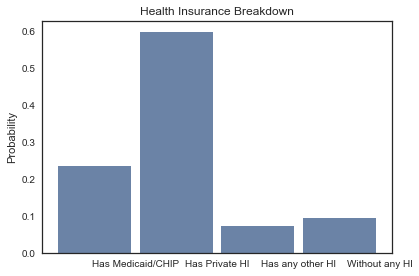

In [20]:
pmf_a = Pmf(df["HEALTH_INSURANCE"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability', title = 'Health Insurance Breakdown')

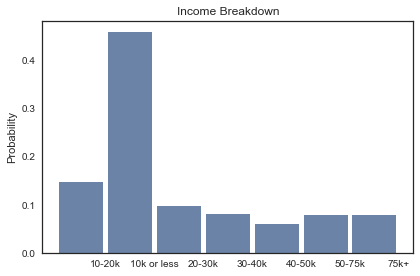

In [34]:
pmf_a = Pmf(df["INCOME"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability', title = 'Income Breakdown')
#Find a way to switch order of first and second bars

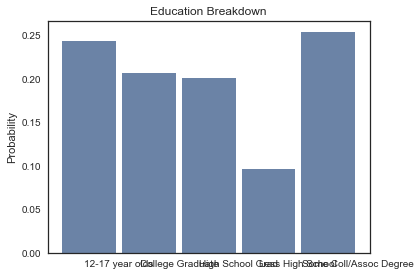

In [36]:
pmf_a = Pmf(df["EDUCATION"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability', title = 'Education Breakdown')
#turn this one sideways

## Exploring Crosstabs

#### Health Insurance and Painkiller use

It appears that for  general painkillers, people with private insurance or no insurance were more likely to have taken opioids, but people on Medicaid had a significantly higher proportion of people still taking painkillers compared to all that had ever started.

In [37]:
ct = pd.crosstab(df["HEALTH_INSURANCE"], df["PRES_PAINKILLER_USE"], 
                 rownames=['Health Insurance'], colnames=['Used Prescription Painkillers'], 
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months,Never used
Health Insurance,,,
Has Medicaid/CHIP,32.189,12.900,54.911
Has Private HI,29.004,28.656,42.340
Has any other HI,34.198,23.449,42.352
Without any HI,28.177,19.232,52.591
All,30.052,23.676,46.272


#### Come back to this to find survey method for misuse
People with private health insurance had the lowest misuse rates, but we need to come back to see the metric for this variable

In [38]:
ct = pd.crosstab(df["HEALTH_INSURANCE"], df["OXYCONTIN_MISUSED"],
                 rownames=['Health Insurance'], colnames=['Misused Prescription Painkillers'],
                  margins=True, normalize='index')
(ct*100).round(decimals=3)

Misused Prescription Painkillers,Misused - past year,Did not misuse - past year
Health Insurance,,
Has Medicaid/CHIP,0.933,99.067
Has Private HI,0.588,99.412
Has any other HI,0.519,99.481
Without any HI,1.532,98.468
All,0.753,99.247


However, having any type of health insurance seems to be related to increased opioid use in the short and long term.

In [39]:
ct = pd.crosstab(df["ANY_HI"], df["PRES_PAINKILLER_USE"], 
                 rownames=['Any Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize="index")
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months,Never used
Any Health Insurance,,,
With HI,30.246,24.137,45.617
Without HI,28.177,19.232,52.591
All,30.052,23.676,46.272


#### Filtering by: Used any painkiller

In [40]:
used_pk = df[df.PRES_PAINKILLER_USE != "Never used"]

Of those who had ever used prescription painkillers, those on Medicaid had a significantly higher chance of staying on painkillers or taking them recently. This could potentially be a proxy for length of time taking opioids.

In [41]:
ct = pd.crosstab(used_pk["HEALTH_INSURANCE"], used_pk["PRES_PAINKILLER_USE"],
                 rownames=['Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months
Health Insurance,,
Has Medicaid/CHIP,71.390,28.610
Has Private HI,50.301,49.699
Has any other HI,59.323,40.677
Without any HI,59.434,40.566
All,55.933,44.067


## Explorimg PMFs

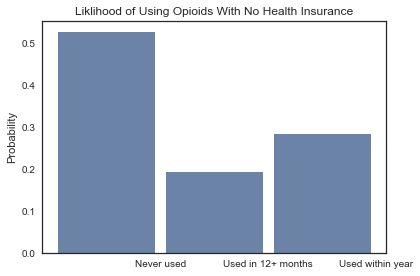

In [47]:
pmf_a = Pmf(no_hi["PRES_PAINKILLER_USE"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability', title = 'Liklihood of Using Opioids With No Health Insurance')

Over half of all people who have ever tried opioids have continued to take them in the past year. Some of this could be because first time use was in the past year, but it is unlikely to be a majority. 

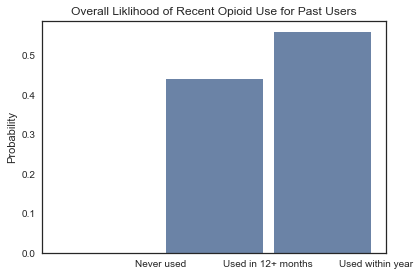

In [51]:
pmf_a = Pmf(used_pk["PRES_PAINKILLER_USE"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability', title = 'Overall Liklihood of Recent Opioid Use for Past Users')

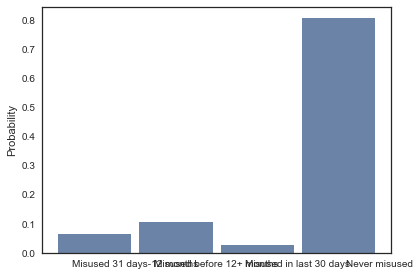

In [58]:
pmf_a = Pmf(used_pk["REC_PAINKILLER_MISUSE"])
thinkplot.Hist(pmf_a)
decorate(ylabel='Probability')


In [59]:
no_hi = df[df.HEALTH_INSURANCE == "Without any HI"]
priv_hi = df[df.HEALTH_INSURANCE == "Has Private HI"]
pmf_a = Pmf(no_hi["REC_PAINKILLER_MISUSE"])
pmf_b = Pmf(priv_hi["REC_PAINKILLER_MISUSE"])

In all timeframes, those without health insurance are more likely to have abused painkillers than those with private health insurance.

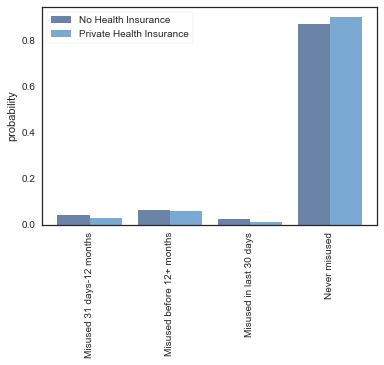

In [57]:
width = 0.4
thinkplot.Hist(pmf_a, align='right', width=width, label = 'No Health Insurance')
thinkplot.Hist(pmf_b, align='left', width=width, label = 'Private Health Insurance')
thinkplot.Config(ylabel='probability')
plt.xticks(np.arange(0, 4, step=1), rotation='vertical')
thinkplot.Show()